In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from enum import Enum
import random

In [2]:
class Directions(Enum):
    UP = 0, 1,
    DOWN = 0, -1,
    LEFT = -1, 0,
    RIGHT = 1, 0,
    NONE = 0, 0

class Tile(Enum):
    NONE = 0,
    WALL = 1

class Particle:
    def __init__(self, x, y, color):
        self.column = x
        self.row = y
        self.color = color

    def move(self, available_map):
        direction = random.choice(list(Directions))

        next_column, next_row = self.column + direction.value[0], self.row + direction.value[1]

        if available_map.position_is_available(next_column, next_row):
            self.column = next_column
            self.row = next_row

    def get_color(self):
        return self.color

    def __str__(self):
        return "Pos: [" + str(self.row) + ", " + str(self.column) + "]"
    
class Map:
    def __init__(self, columns, rows):
        self.columns = columns + 3
        self.rows = rows + 2
        self.map = [[Tile.NONE for x in range(self.columns)] for y in
                    range(self.rows)]

        for x in range(self.columns):
            self.map[0][x] = Tile.WALL
        for x in range(self.rows):
            self.map[x][0] = Tile.WALL
        for x in range(self.columns):
            self.map[- 1][x] = Tile.WALL
        for x in range(self.rows):
            self.map[x][-1] = Tile.WALL

        self.wall_column = self.columns // 2

        for x in range(self.rows):
            self.map[x][self.wall_column] = Tile.WALL

    def position_is_available(self, column, row):
        return self.map[row][column] != Tile.WALL

    def remove_wall(self, lower_half=False):
        if not lower_half:
            for x in range(1, self.rows // 2):
                self.map[x][self.wall_column] = Tile.NONE
        for x in range(self.rows // 2, self.rows - 1):
            self.map[x][self.wall_column] = Tile.NONE

    def __str__(self):
        return self.map.__str__()

    

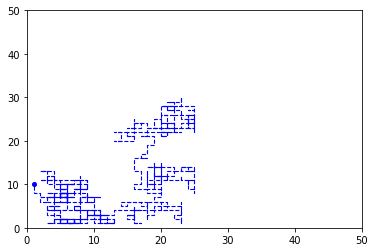

In [3]:
x = 0
y = 0
x_data = []
y_data = []

fig = plt.figure()
ax1 = plt.axes(xlim=(0, 50), ylim=(0, 50))
mat, = ax1.plot([], [], linewidth=0, color='b', marker='o', markersize="4")
line, = ax1.plot(0, 0, color='b', lw=1.1, ls='dashed', markersize="0")

frames = 1000

particle = Particle(25, 25, 'b')
available_map = Map(50, 50)


def animate_rw(i):
    column = particle.column
    row = particle.row

    x_data.append(column)
    y_data.append(row)
    mat.set_data([column], [row])
    line.set_xdata(x_data)
    line.set_ydata(y_data)

    particle.move(available_map)

    return mat, line,


anim = animation.FuncAnimation(fig, animate_rw, interval=100, blit=True, frames=frames, repeat=False)
# plt.show()

Writer = animation.writers['ffmpeg']
writer = Writer(fps=60, metadata=dict(artist='Me'), bitrate=1800)

anim.save('ej-8.mp4', writer=writer)